In [197]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import joblib
import itertools


from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet.diagnostics import cross_validation, performance_metrics

In [49]:
np.random.seed(13)
rng = np.random

In [106]:
a1_df = joblib.load("../data/artist_1.pkl")

In [107]:
a1_df = a1_df.reset_index()

In [108]:
df = a1_df.copy()
df["is_weekend"] = df["timestamp"].dt.weekday >= 5 
df["is_weekend"] = df["is_weekend"].astype(int)

<Axes: xlabel='timestamp'>

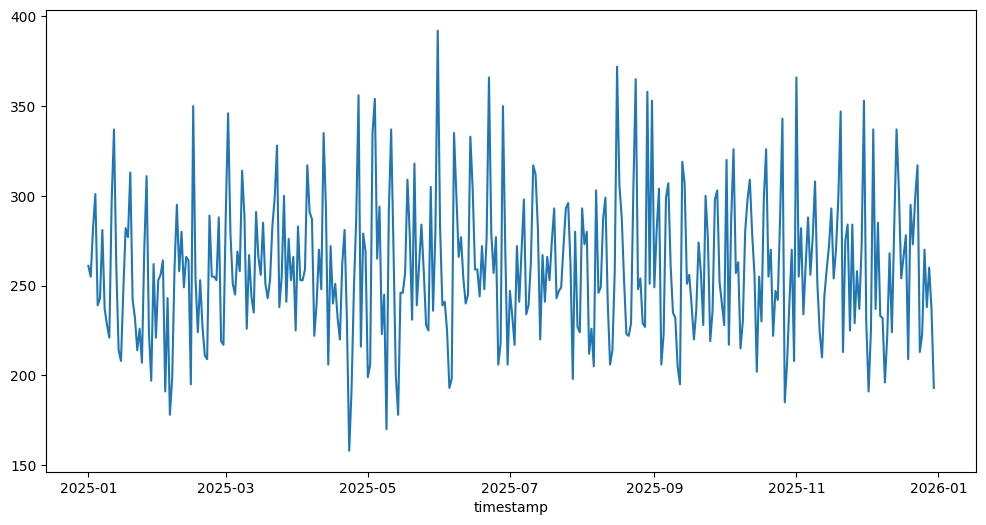

In [244]:
vc = (a1_df)['timestamp'].dt.date.value_counts()
vc = vc.sort_index()
vc = vc[:-1]
vc.plot(kind='line', figsize=(12, 6))

In [245]:
inject_date_start = date(2025, 5, 1)
inject_date_end = date(2025, 5, 10)
vc[(vc.index >= inject_date_start) & (vc.index <= inject_date_end)] *= 1.6

/tmp/ipykernel_4150/2262646576.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[318.4 329.6 536.  566.4 424.  470.4 356.8 392.  272.  465.6]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vc[(vc.index >= inject_date_start) & (vc.index <= inject_date_end)] *= 1.6


In [246]:
inject_date_start = date(2025, 3, 5)
inject_date_end = date(2025, 3, 20)
vc[(vc.index >= inject_date_start) & (vc.index <= inject_date_end)] *= 1.4

In [247]:
inject_date_start = date(2025, 10, 22)
inject_date_end = date(2025, 10, 26)
vc[(vc.index >= inject_date_start) & (vc.index <= inject_date_end)] *= 1.8

<Axes: xlabel='timestamp'>

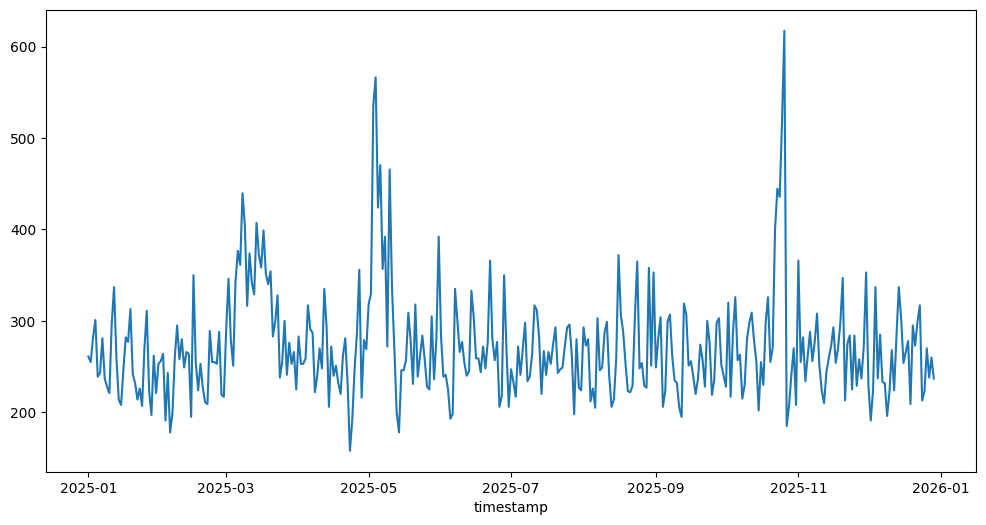

In [248]:
vc = vc[:-1]
vc.plot(kind='line', figsize=(12, 6))

In [249]:
daily = vc.reset_index()
daily.columns = ["ds", "y"]
cap_val = daily['y'].max() * 1.05
daily['cap'] = cap_val
daily["is_weekend"] = df["is_weekend"]


In [250]:
param_grid = {
    "changepoint_prior_scale": [0.001, 0.005, 0.01, 0.05, 0.1],
    "changepoint_range": [0.8, 0.9, 0.95],
    "weekend_prior_scale": [0.1, 1.0, 5.0],
}
all_params = [
    dict(zip(param_grid.keys(), v))
    for v in itertools.product(*param_grid.values())
]

In [251]:
best_rmse = float("inf")
best_model = None
best_params = None

for params in all_params:
    model = Prophet(
        growth="logistic",
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=params["changepoint_prior_scale"],
        changepoint_range=params["changepoint_range"],
    )

    model.add_regressor("is_weekend", prior_scale=params["weekend_prior_scale"])

    model.fit(daily)
    
    df_cv = cross_validation(
        model,
        initial="250 days",
        period="30 days",     
        horizon="90 days"     
    )
    
    df_p = performance_metrics(df_cv, rolling_window=1)
    mean_rmse = df_p['rmse'].mean()
    
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_model = model 
        best_params = params

print("Best RMSE:", best_rmse)
print("Best params:", best_params)


14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing
14:29:40 - cmdstanpy - INFO - Chain [1] start processing
14:29:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:41 - cmdstanpy - INFO - Chain [1] start processing
14:29:41 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing
14:29:42 - cmdstanpy - INFO - Chain [1] start processing
14:29:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:43 - cmdstanpy - INFO - Chain [1] start processing
14:29:43 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:44 - cmdstanpy - INFO - Chain [1] done processing
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:45 - cmdstanpy - INFO - Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:46 - cmdstanpy - INFO - Chain [1] start processing
14:29:46 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:47 - cmdstanpy - INFO - Chain [1] start processing
14:29:47 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


Best RMSE: 65.55130285978036
Best params: {'changepoint_prior_scale': 0.005, 'changepoint_range': 0.9, 'weekend_prior_scale': 1.0}


In [252]:
final_model = Prophet(
    growth="logistic",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    changepoint_range=best_params["changepoint_range"],
)
final_model.add_regressor("is_weekend", prior_scale=best_params["weekend_prior_scale"])
final_model.fit(daily)

#future = final_model.make_future_dataframe(periods=30)
#future['cap'] = cap_val
forecast = final_model.predict(daily)

14:29:48 - cmdstanpy - INFO - Chain [1] start processing
14:29:48 - cmdstanpy - INFO - Chain [1] done processing


Text(83.34722222222221, 0.5, 'Streams')

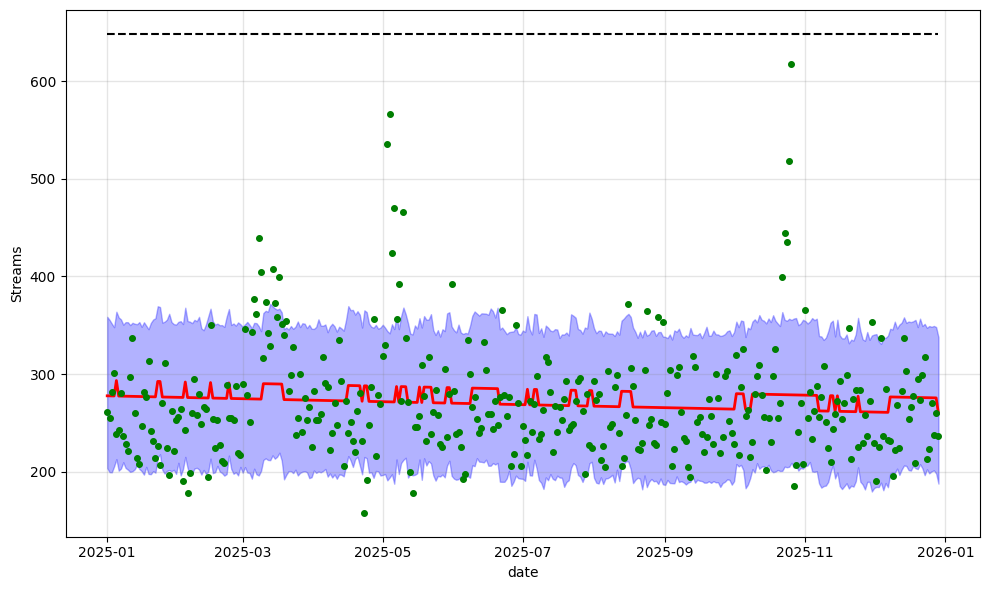

In [253]:
fig = model.plot(forecast)
ax = fig.gca()
forecast_line = ax.get_lines()[1]
forecast_line.set_color('red')
forecast_line.set_linewidth(2.)
historical_line = ax.get_lines()[0]
historical_line.set_color('blue')
#historical_line.set_linestyle('-')
historical_line.set_linewidth(1)
for collection in ax.collections:
    collection.set_alpha(0.3)
    collection.set_facecolor('blue')
    collection.set_edgecolor('blue')
plt.plot(daily["ds"], daily["y"], 'o', markersize=4, color="green")
plt.xlabel("date")
plt.ylabel("Streams")

In [254]:
forecast = forecast.copy()
forecast['is_outlier'] = False
forecast['y'] = daily['y']

In [255]:
forecast['y_std'] = (forecast["yhat_upper"] - forecast["yhat_lower"]) / 2

In [256]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,is_weekend,is_weekend_lower,is_weekend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,is_outlier,y,y_std
0,2025-01-01,277.747429,648.27,203.725782,358.649143,277.747429,277.747429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,277.747429,False,261.0,77.461680
1,2025-01-02,277.697212,648.27,199.590578,355.512282,277.697212,277.697212,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,277.697212,False,255.0,77.960852
2,2025-01-03,277.646997,648.27,199.408446,351.652715,277.646997,277.646997,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,277.646997,False,282.0,76.122134
3,2025-01-04,277.596784,648.27,205.499246,348.026224,277.596784,277.596784,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,277.596784,False,301.0,71.263489
4,2025-01-05,277.546574,648.27,212.889048,363.869656,277.546574,277.546574,15.849214,15.849214,15.849214,...,15.849214,15.849214,15.849214,0.0,0.0,0.0,293.395787,False,239.0,75.490304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2025-12-25,259.932626,648.27,198.378304,349.254566,259.932626,259.932626,15.849214,15.849214,15.849214,...,15.849214,15.849214,15.849214,0.0,0.0,0.0,275.781839,False,223.0,75.438131
359,2025-12-26,259.883370,648.27,200.384148,348.388839,259.883370,259.883370,15.849214,15.849214,15.849214,...,15.849214,15.849214,15.849214,0.0,0.0,0.0,275.732584,False,270.0,74.002345
360,2025-12-27,259.834118,648.27,201.435127,349.311519,259.834118,259.834118,15.849214,15.849214,15.849214,...,15.849214,15.849214,15.849214,0.0,0.0,0.0,275.683331,False,238.0,73.938196
361,2025-12-28,259.784868,648.27,198.332677,348.125164,259.784868,259.784868,15.849214,15.849214,15.849214,...,15.849214,15.849214,15.849214,0.0,0.0,0.0,275.634082,False,260.0,74.896244


In [257]:
forecast.loc[
    (forecast["y"] > forecast["yhat"] + 2*forecast["y_std"]) |
    (forecast["y"] < forecast["yhat"] - 2*forecast["y_std"]),
    "is_outlier"
] = True
outliers = forecast[forecast["is_outlier"]]

Text(83.34722222222221, 0.5, 'Streams')

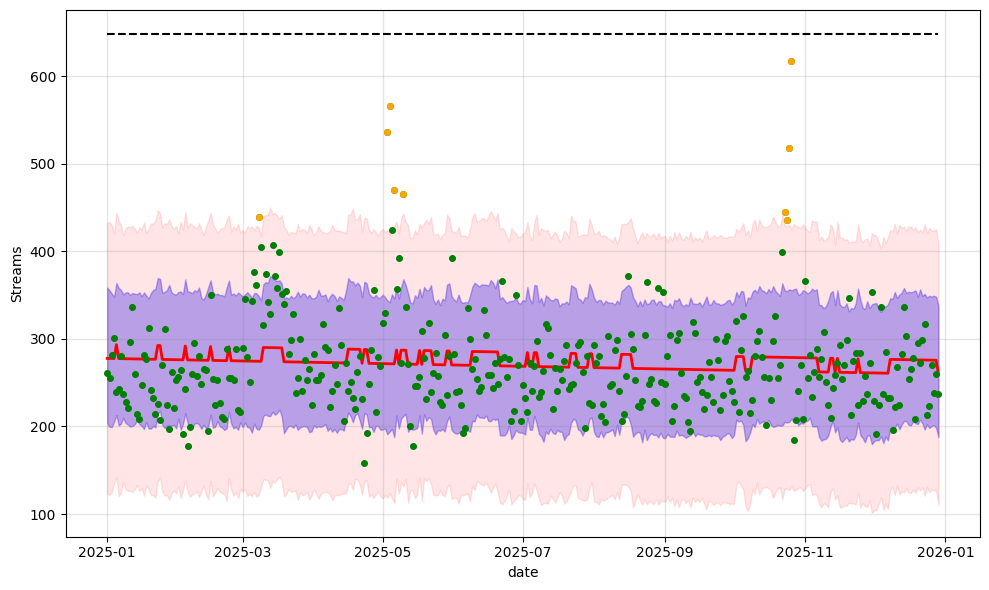

In [258]:
fig = model.plot(forecast)
ax = fig.gca()
forecast_line = ax.get_lines()[1]
forecast_line.set_color('red')
forecast_line.set_linewidth(2.)
historical_line = ax.get_lines()[0]
historical_line.set_color('blue')
#historical_line.set_linestyle('-')
historical_line.set_linewidth(1)
for collection in ax.collections:
    collection.set_alpha(0.3)
    collection.set_facecolor('blue')
    collection.set_edgecolor('blue')
plt.plot(daily["ds"], daily["y"], 'o', markersize=4, color="green")
plt.plot(outliers["ds"], outliers["y"], 'o', markersize=4, color="orange")

upper_2std = forecast["yhat"] + 2*forecast["y_std"]
lower_2std = forecast["yhat"] - 2*forecast["y_std"]

ax.fill_between(
    forecast["ds"],
    lower_2std,
    upper_2std,
    color="red",
    alpha=0.1,
    label="±2×Uncertainty"
)

plt.xlabel("date")
plt.ylabel("Streams")

In [259]:
def find_consecutive_runs(bool_series, min_length=3):
    runs = []
    count = 0
    for i, val in enumerate(bool_series):
        if val:
            count += 1
        else:
            if count >= min_length:
                runs.append((i - count, i - 1))  
            count = 0
    if count >= min_length:
        runs.append((len(bool_series) - count, len(bool_series) - 1))
    return runs

In [260]:
forecast["above_1std"] = forecast["y"] > (forecast["yhat"] + forecast["y_std"])
forecast["below_1std"] = forecast["y"] < (forecast["yhat"] - forecast["y_std"])

In [261]:
above_runs = find_consecutive_runs(forecast["above_1std"], min_length=3)
below_runs = find_consecutive_runs(forecast["below_1std"], min_length=3)


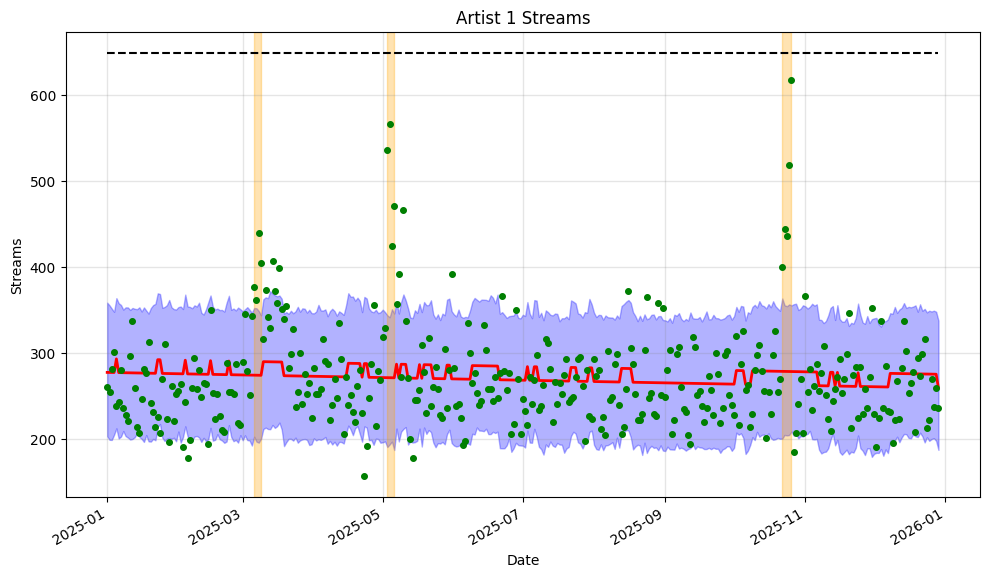

In [265]:
fig = model.plot(forecast)
ax = fig.gca()

forecast_line = ax.get_lines()[1]
forecast_line.set_color('red')
forecast_line.set_linewidth(2.0)
historical_line = ax.get_lines()[0]
historical_line.set_color('blue')
historical_line.set_linewidth(1.0)

for collection in ax.collections:
    collection.set_alpha(0.3)
    collection.set_facecolor('blue')
    collection.set_edgecolor('blue')

ax.plot(forecast["ds"], forecast["y"], 'o', markersize=4, color="green", label="Observed")

for start, end in above_runs:
    ax.axvspan(forecast["ds"].iloc[start], forecast["ds"].iloc[end],
               color='orange', alpha=0.3, label="Detected run")

ax.set_xlabel("Date")
ax.set_ylabel("Streams")
#ax.legend()
fig.autofmt_xdate()
plt.title("Artist 1 Streams")
plt.show()